# 機器學習 - 回歸模型 (Regression Model) (2)
- 2022 機器學習 Summer Session 教材 (師培中心)<br>
- @ 台南應用科技大學 資管系 杜主民

## Regulization 正規化 - Ridge Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
n_samples, n_features = 15, 10        
rng = np.random.RandomState(1)
X = rng.randn(n_samples, n_features)  # 產生 15 列，每列 10 欄位的常態分佈亂數
y = rng.randn(n_samples)

lr = LinearRegression()
lr.fit(X, y)
r2 = lr.score(X,y)
print(f'Linear Regression r2= {np.round(r2,2)}')

rdg = Ridge(alpha = 0.5)  # alpha is tuning parameter - penalize the model
rdg.fit(X, y)
r2 = rdg.score(X,y)
print(f'Ridge Regression r2= {np.round(r2,2)}')

Linear Regression r2= 0.61
Ridge Regression r2= 0.51


### 測試不同的懲罰值對 Ridge Regression 的影響

In [13]:
n_samples, n_features = 15, 10        
rng = np.random.RandomState(1)
X = rng.randn(n_samples, n_features)   # 產生 15 列，每列 10 欄位的常態分佈亂數
y = rng.randn(n_samples)

Ridge_alpha = np.linspace(1.0, 0.1, 10)  # 產生 10 個懲罰項 alpha，從 1.5 ~ 0.6
for alpha in Ridge_alpha:
    rdg = Ridge(alpha = alpha) # alpha is tuning parameter - penalize the model
    rdg.fit(X, y)
    r2 = rdg.score(X,y)
    print(f'Alpha: {np.round(alpha,2)}, Ridge Regression r2: {np.round(r2,2)}')

Alpha: 1.0, Ridge Regression r2: 0.47
Alpha: 0.9, Ridge Regression r2: 0.48
Alpha: 0.8, Ridge Regression r2: 0.48
Alpha: 0.7, Ridge Regression r2: 0.49
Alpha: 0.6, Ridge Regression r2: 0.5
Alpha: 0.5, Ridge Regression r2: 0.51
Alpha: 0.4, Ridge Regression r2: 0.52
Alpha: 0.3, Ridge Regression r2: 0.53
Alpha: 0.2, Ridge Regression r2: 0.55
Alpha: 0.1, Ridge Regression r2: 0.58


### 比較 Linear Regression 和 Ridge Regression 對尚未訓練過的資料的測試結果

### 訓練資料

In [14]:
n_samples, n_features = 15, 10        
rng = np.random.RandomState(1)         # 訓練資料的亂數種子是 1
X = rng.randn(n_samples, n_features)   # 產生 15 列，每列 10 欄位的常態分佈亂數
y = rng.randn(n_samples)

lr = LinearRegression()   # Linear Regression
lr.fit(X, y)
r2 = lr.score(X,y)
print(f'Linear Regression r2= {np.round(r2,2)}')

rdg = Ridge(alpha = 0.5)  # Ridge Regression
rdg.fit(X, y)
r2 = rdg.score(X,y)
print(f'Ridge Regression r2= {np.round(r2,2)}')

Linear Regression r2= 0.61
Ridge Regression r2= 0.51


### 測試資料
- 選用和訓練資料不同的隨機種子
- Linear Regression 使用訓練資料的 `lr` model 物件
- Ridge Regression 也用和訓練相同的資料集
- 資料的筆數和特徵值相同

In [15]:
n_samples, n_features = 15, 10    
rng = np.random.RandomState(2)         # 訓練資料的亂數種子是 2
X = rng.randn(n_samples, n_features)   # 產生 15 列，每列 10 欄位的常態分佈亂數
y = rng.randn(n_samples)

r2 = lr.score(X, y)       # 使用訓練資料的 `lr` model 物件
print(f'Linear Regression r2= {np.round(r2, 2)}')

rdg = Ridge(alpha = 0.5)  
rdg.fit(X, y)
r2 = rdg.score(X,y)
print(f'Ridge Regression r2= {np.round(r2,2)}')

Linear Regression r2= -16.21
Ridge Regression r2= 0.75


### 上述可以看出 Linear Regression 對尚未訓練過的資料的決定係數 $r^2$ 明顯小於 Ridge Regression 的決定係數 $r^2$。
### 意味著對單純採用最小平方法的 Linear Regression，雖然在訓練資料的 $r^2=0.61$ 優於 Ridge Regression；但測試資料的 Variance 很高，其 $r^2=-16.21$，而 Ridge Regression 在測試資料仍能保持較佳的 Variance，其  $r^2=0.75$ 明顯優於 Linear Regression。

<a href='https://help.mobagel.com/zh-TW/support/solutions/articles/47000741407-%E7%82%BA%E4%BB%80%E9%BA%BC%E6%9C%89%E4%BA%9B%E6%A8%A1%E5%9E%8B%E7%9A%84%E6%B1%BA%E5%AE%9A%E4%BF%82%E6%95%B8-r-squared-%E6%95%B8%E5%80%BC%E6%98%AF%E8%B2%A0%E6%95%B8-'>為什麼決定係數 r^2 會小於 0</a>

## Regulization 正規化 - Lasso Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
n_samples, n_features = 15, 10        
rng = np.random.RandomState(1)
X = rng.randn(n_samples, n_features)   # 產生 15 列，每列 10 欄位的常態分佈亂數
y = rng.randn(n_samples)

lr = LinearRegression()
lr.fit(X, y)
r2 = lr.score(X,y)
print(f'Linear Regression r2= {np.round(r2,2)}')

lso = Lasso(alpha = 0.1)  # alpha is tuning parameter - penalize the model
lso.fit(X, y)
r2 = lso.score(X,y)
print(f'Lasso Regression r2= {np.round(r2,2)}')

Linear Regression r2= 0.61
Lasso Regression r2= 0.33


### 檢查 Lasso Regression 訓練後的參數 `coef_`
- Lasso 與 Ridge 有一點很大差異，Lasso 的各個參數有可能會降低至 0，亦即有 feature selection 的能力，但 Ridge 的斜率只會接近於 0
- 此案例可見到部分欄位的參數斜率是 0

In [17]:
lso.coef_

array([-0.35999253,  0.        , -0.        ,  0.        , -0.12667645,
        0.02161333, -0.        ,  0.18285927,  0.        ,  0.        ])

### Lasso Regression 使用 Boston house dataset

In [38]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

#  Load the Boston Data Set
bh = datasets.load_boston()
X = bh.data
y = bh.target

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0)

# Fit the Lasso model
lasso.fit(X_train, y_train)

# Create the model score
print(f'訓練資料 r^2={lasso.score(X_train, y_train)}, 測試資料 r^2={lasso.score(X_test, y_test)}')

訓練資料 r^2=0.6899591642958296, 測試資料 r^2=0.6559060829154338


In [39]:
lasso.coef_

array([-0.09191567,  0.03466685, -0.        ,  0.        , -0.        ,
        1.28131738,  0.01143974, -0.61602099,  0.19150077, -0.00954028,
       -0.70335005,  0.01083224, -0.77992069])

### 導入 Lasso Regression，得出訓練模型結果，再關心模型的係數 (coef_，代表各個 feature 在模型完成訓練後的斜率)，會發現一個有趣的結果! 有幾個 feature 的 coef_ 值為 0。
- 這三個 features 是['INDUS','CHAS','NOX']
- 為什麼 Lasso Regression 在計算時會自動將這三個 feature 設為 0 呢? 
```python
Lasso Regression is a machine learning algorithm that can be used to perform linear regression while also reducing the number of features used in the model.
Lasso regression is used in machine learning to prevent overfitting. It is also used to select features by setting coefficients to zero.
```

### Ridge Regression 使用 Boston house dataset

In [32]:
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#  Load the Boston Data Set
bh = datasets.load_boston()
X = bh.data
y = bh.target

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of Lasso Regression implementation
ridge = Ridge(alpha=1.0)

# Fit the Lasso model
ridge.fit(X_train, y_train)

# Create the model score
print(f'訓練資料 r^2={ridge.score(X_train, y_train)}, 測試資料 r^2={ridge.score(X_test, y_test)}')

訓練資料 r^2=0.7415671063241829, 測試資料 r^2=0.7041586727559437


### Linear Regression 使用 Boston house dataset

In [33]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#  Load the Boston Data Set
bh = datasets.load_boston()
X = bh.data
y = bh.target

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of Lasso Regression implementation
lr = LinearRegression()

# Fit the Lasso model
lr.fit(X_train, y_train)

# Create the model score
print(f'訓練資料 r^2={lr.score(X_train, y_train)}, 測試資料 r^2={lr.score(X_test, y_test)}')

訓練資料 r^2=0.7434997532004697, 測試資料 r^2=0.711226005748496


## 練習題三
- 使用 sklearn 的 Boston House 資料集。
- 請載入 `from sklearn.datasets import load_boston`，再執行 `load_boston()`函數，建立資料集物件變數, e.g., `boston_dataset=load_boston()`.
- boston_dataset 物件有幾個屬性:
    - data: 特徵值資料
    - DESCR: 描述性敘述
    - feature_names: 欄位名稱 (請參考底下說明)
    - target: 目標值
- 請將 data 當成 features 欄位；將 target 屬性當成目標。


- CRIM :每個城鎮的人均犯罪率 (per capita crime rate by town)
- ZN : 佔地25,000平方英尺以上的住宅區域比例(proportion of residential land zoned for lots over 25,000 sq.ft.)
- INDUS : 每個城鎮非零售業的營業面積比例(proportion of non-retail business acres per town)
- CHAS : 是否靠近河邊(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))
- NOX : 一氧化氮濃度（ppm)(nitric oxides concentration (parts per 10 million))
- RM : 每個住宅的平均房間數(average number of rooms per dwelling)
- AGE : 1940年前私有住宅的住房比率(proportion of owner-occupied units built prior to 1940)
- DIS : 與五個波士頓就業中心的加權距離(weighted distances to five Boston employment centres)
- RAD : 徑向公路的通達指數(index of accessibility to radial highways)
- TAX : 每10,000美元的所需繳的財產稅(full-value property-tax rate per 10,000)
- PTRATIO : 每個城鎮的師生比例(pupil-teacher ratio by town)
- B : 黑人比例(值為$1000(Bk-0.63)^2$ where Bk is the proportion of blacks by town)
- LSTAT : 中下階級的比率(% lower status of the population)

### 題目
1. 請分割訓練和測試資料後執行Linear Regression，Ridge Regression，以及 Lasso Regression，檢驗訓練資料和測試資料的 $r^2$。
2. 依據資料集的 feature_names 欄位名稱，只取 CRIM 此欄位大於等於 2 的資料當成 training data，其餘的資料當成 testing data。
3. 請將 `NOX`, `INDUS`, `TAX`, `LSTAT` 欄位當 features，MEDV 是 target，將資料分成 60% traiing data, 40% testing data，請計算Linear Regression，Ridge Regression 的 $r^2$

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.datasets import load_boston

In [45]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# 新增 target 欄位名稱 MEDV
boston['MEDV'] = boston_dataset.target

In [47]:
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [103]:
X_train = boston[boston['CRIM'] <= 1.5].CRIM
y_train = boston[boston['CRIM'] <= 1.5].MEDV
X_test = boston[boston['CRIM'] > 1.5].CRIM
y_test = boston[boston['CRIM'] > 1.5].MEDV

In [104]:
# X_train = X_train[:,np.newaxis]
X_train = np.array(X_train).reshape(len(X_train),1)
X_test = np.array(X_test).reshape(len(X_test),1)

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 1)
(350,)
(156, 1)
(156,)


In [108]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'訓練資料 r^2={lr.score(X_train, y_train)}, 測試資料 r^2={lr.score(X_test, y_test)}')

訓練資料 r^2=0.015065966097820516, 測試資料 r^2=-24.520731158538165


In [109]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=5)
rdg.fit(X_train, y_train)
print(f'訓練資料 r^2={rdg.score(X_train, y_train)}, 測試資料 r^2={rdg.score(X_test, y_test)}')

訓練資料 r^2=0.014820245263087894, 測試資料 r^2=-17.778040520848833


<hr style='border-color:brown; border-width:3px'>

## 多項式迴歸 Polynomial Regression
- 多項式迴歸是迴歸分析的一種形式，其中特徵自變數 x 和目標因變量 y 之間不適合使用直線迴歸線來捕捉資料間的趨勢。
- 當特徵自變數與目標之間的關係是彎曲的線條，透過多項式迴歸可建構趨勢曲線貼合資料間的型態。
- 例如 $f(x) = x^2 + 2sin(x)$，$f(x)$ 是 x 的 2 次多項式。
- 多項式迴歸是欲擬合 x 的值與 f(x) 之間的非直線關係。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize']=[7,5]

### $x^2 + 20sin(x)$

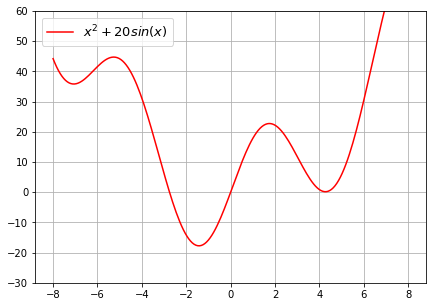

In [2]:
x = np.linspace(-8, 8, 200)
f_x = [np.power(i, 2) + 20 * np.math.sin(i) for i in x]
plt.plot(x, f_x, c='r', label='$x^2+20sin(x)$')
plt.ylim(-30, 60)
plt.grid(True)
plt.legend(fontsize=13)

### 產生 20 筆數值模擬多項式的分布

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[7,5]

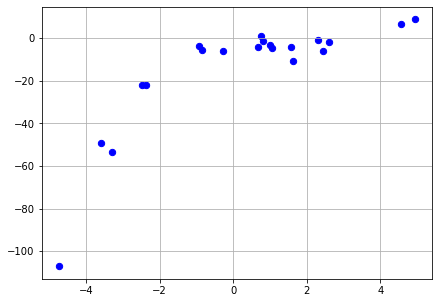

In [4]:
# 產生 20 筆隨機值
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=40, c='b')
plt.grid(True)

### 上述的資料分布使用線性回歸適合嗎?
### 代入 sklearn 的 Linear Regression 模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

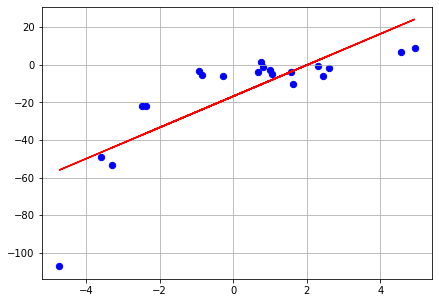

In [5]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
X = x[:, np.newaxis]   # x = x.reshape(len(x),1)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, s=40, c='b')
plt.plot(X, y_pred, color='r')
plt.grid(True)

### 上述的迴歸線能正確捕捉到資料的趨勢嗎? 檢查決定係數 $R^2$

In [6]:
print(f'決定係數 R^2={model.score(X,y)}')

決定係數 R^2=0.6386750054827146


### 決定係數 $R^2$=0.639，迴歸線擬合的情行不算好，應歸屬於低度擬合 ( Underfitting) 案例。

### 過度擬和 (Overfitting) vs. 低度擬合 (Underfitting)
- 訓練一個機器學習模型時，不論是在訓練集或是測試集資料都無法達到一定的準度時，此狀況稱為 underfitting(低度擬合)。
- Underfitting 的原因可能是「訓練時間不足」或是「模型複雜度不足」。此案例發生 under-fitting 的原因是簡單現行迴歸無法捕捉模型的趨勢，屬於「模型複雜度不足」的原因。

![underfitting](https://miro.medium.com/max/1400/1*UCd6KrmBxpzUpWt3bnoKEA.png)
<p style="text-align:right">source: <a href='https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/'>Linear Regression</a></p>

### 為了改善 Underfitting 的問題，應該改善迴歸模型的複雜度。
### $\Rightarrow \,\,$從簡單線性迴歸  $f(x) = w_0 + w_1x$，更改為 2 次多項式 $f(x) = w_0 + w_1x + w_2x^2$，但仍視為 Linear Regression。
- 採用 sklearn 的 `PolynominalFeatures` 模組

### $y = x_i - 2x_i^2 + 0.5x_i^3 + \beta$

In [1]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures 

RMSE=10.120437473614711
R^2=0.8537647164420812


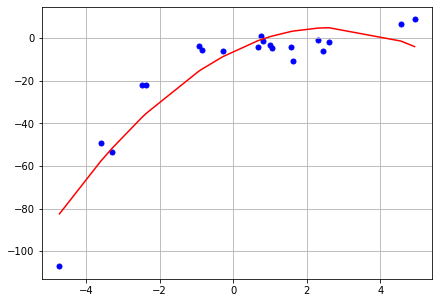

In [8]:
# source: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
plt.rcParams['figure.figsize']=[7,5]
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
#y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)  # 二次多項式
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(f'RMSE={rmse}')
print(f'R^2={r2}')

plt.scatter(x, y, s=25, c='b')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')
plt.grid(True)

### 得出二次多項式 $R^2 = 0.85376$

### 若是三次多項式呢?

RMSE=1.1131620902350652
R^2=0.9982308265442509


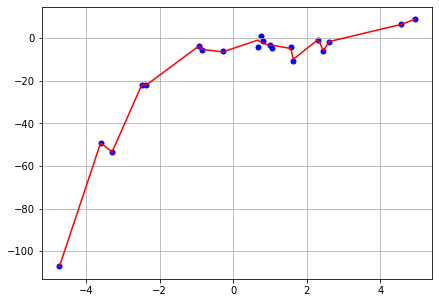

In [6]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=20)  # 三次多項式
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(f'RMSE={rmse}')
print(f'R^2={r2}')

plt.scatter(x, y, s=25, c='b')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')
plt.grid(True)

### 得出三次多項式 $R^2 = 0.98301$

### 如果你想要不斷提高迴歸模型的擬合程度，應該如何做? 這樣做的優點及缺點為何呢?

<hr style='border-color:brown; border-width:3px'>

### 產生 30  組的資料，其中20 組用於訓練， 10 組用於測試。

In [53]:
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 30)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-5, 5, 30)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

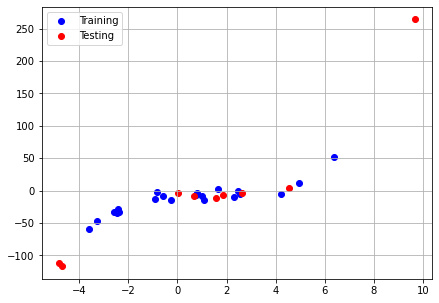

In [55]:
# 繪圖
plt.scatter(X_train, y_train, c='b', label='Training') # 訓練資料
plt.scatter(X_test, y_test, c='r', label='Testing')   # 測試資料
plt.legend()
plt.grid(True)

In [56]:
# transforming the data to include another axis
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=3)  # 三次多項式
X_train_poly = polynomial_features.fit_transform(X_train)
#X_test_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_poly_pred = model.predict(X_test_poly)

rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))
r2 = r2_score(y_test, y_poly_pred)
print(f'RMSE={rmse}')
print(f'R^2={r2}')

RMSE=4.671274057058779
R^2=0.997958973449659


In [59]:
r_squared = model.score(X_train_poly, y_train)
print('訓練資料 r_squared: ', r_squared)

r_squared = model.score(X_test_poly, y_test)
print('測試資料 r_squared: ', r_squared)

訓練資料 r_squared:  0.9595498267817102
測試資料 r_squared:  0.997958973449659


In [37]:
#print(X_train.ndim)
#print(X_train_poly.ndim)
#print(X_train_poly)